In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Sat May 29 04:40:10 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install tensorflow-gpu

     |████████████████████████████████| 454.3MB 36kB/s 


In [4]:
import tensorflow as tf

tf.__version__

'2.5.0'

In [7]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
#from tensorflow.keras.applications.inception_v3 import InceptionV3
#from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [6]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/My Drive/DEEP LEARNING/DATASET/Tomato leaf/train'
valid_path = '/content/drive/My Drive/DEEP LEARNING/DATASET/Tomato leaf/valid'

In [8]:
# Import the InceptionV3 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mob =  MobileNet(input_shape=(224, 224, 3), weights='imagenet', include_top=False)

17227776/17225924 [==============================] - 0s 0us/step


In [9]:
# don't train existing weights
for layer in mob.layers:
    layer.trainable = False

In [12]:
# useful for getting number of output classes
folders = glob('/content/drive/My Drive/DEEP LEARNING/DATASET/Tomato leaf/train/*')

In [13]:
folders

['/content/drive/My Drive/DEEP LEARNING/DATASET/Tomato leaf/train/Tomato___Late_blight',
 '/content/drive/My Drive/DEEP LEARNING/DATASET/Tomato leaf/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/My Drive/DEEP LEARNING/DATASET/Tomato leaf/train/Tomato___Early_blight',
 '/content/drive/My Drive/DEEP LEARNING/DATASET/Tomato leaf/train/Tomato___Septoria_leaf_spot',
 '/content/drive/My Drive/DEEP LEARNING/DATASET/Tomato leaf/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/My Drive/DEEP LEARNING/DATASET/Tomato leaf/train/Tomato___Bacterial_spot',
 '/content/drive/My Drive/DEEP LEARNING/DATASET/Tomato leaf/train/Tomato___Leaf_Mold',
 '/content/drive/My Drive/DEEP LEARNING/DATASET/Tomato leaf/train/Tomato___Target_Spot',
 '/content/drive/My Drive/DEEP LEARNING/DATASET/Tomato leaf/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/My Drive/DEEP LEARNING/DATASET/Tomato leaf/train/Tomato___healthy']

In [10]:
# our layers - you can add more if you want
x = Flatten()(mob.output)

In [14]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mob.input, outputs=prediction)

In [15]:
# view the structure of the model
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

In [16]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [17]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [18]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/DEEP LEARNING/DATASET/Tomato leaf/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 18392 images belonging to 10 classes.


In [19]:
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/DEEP LEARNING/DATASET/Tomato leaf/valid',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [20]:

# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
575/575 [==============================] - 6278s 11s/step - loss: 2.1383 - accuracy: 0.8113 - val_loss: 1.2442 - val_accuracy: 0.8936
Epoch 2/15
575/575 [==============================] - 804s 1s/step - loss: 1.3163 - accuracy: 0.9059 - val_loss: 1.6806 - val_accuracy: 0.8951
Epoch 3/15
575/575 [==============================] - 797s 1s/step - loss: 1.0902 - accuracy: 0.9288 - val_loss: 1.7804 - val_accuracy: 0.9012
Epoch 4/15
575/575 [==============================] - 767s 1s/step - loss: 1.1659 - accuracy: 0.9334 - val_loss: 1.9709 - val_accuracy: 0.9071
Epoch 5/15
575/575 [==============================] - 757s 1s/step - loss: 1.0444 - accuracy: 0.9457 - val_loss: 1.1676 - val_accuracy: 0.9426
Epoch 6/15
575/575 [==============================] - 754s 1s/step - loss: 0.8243 - accuracy: 0.9568 - val_loss: 1.9527 - val_accuracy: 0.9176
Epoch 7/15
575/575 [==============================] - 774s 1s/step - loss: 0.9196 - accuracy: 0.9542 - val_loss: 1.3640 - val_accuracy: 0.94

In [21]:
model.save('First_modelTomaToLeaf_MobNet.h5')

In [ ]:
'''print("[INFO] Calculating model accuracy")
scores = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {scores[1]*100}")'''

In [22]:
classes = training_set.class_indices

In [23]:
classes

{'Tomato___Bacterial_spot': 0,
 'Tomato___Early_blight': 1,
 'Tomato___Late_blight': 2,
 'Tomato___Leaf_Mold': 3,
 'Tomato___Septoria_leaf_spot': 4,
 'Tomato___Spider_mites Two-spotted_spider_mite': 5,
 'Tomato___Target_Spot': 6,
 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7,
 'Tomato___Tomato_mosaic_virus': 8,
 'Tomato___healthy': 9}

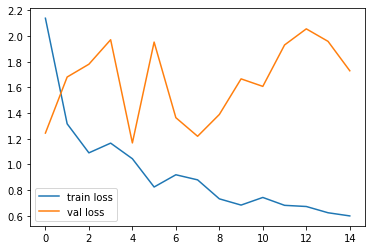

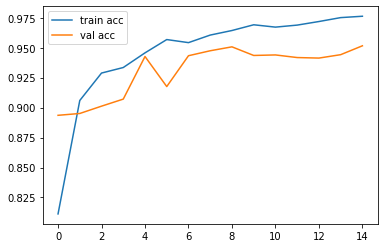

<Figure size 432x288 with 0 Axes>

In [25]:
# Loss
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# Accuracies
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')